In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("Kuesioner Mihu-mihu - Sheet5.csv")
df

,NAMA,NPM,FAKULTAS,JURUSAN,SEMESTER,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fryan Ilham Satriya,24081010209,Fakultas Ilmu Komputer,Informatika,3,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Najwa Sofia,24083010115,Fakultas Ilmu Komputer,Sains Data,3,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Sendy Luis Armando,24081010102,Fakultas Ilmu Komputer,Informatika,3,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Achmad Mukhlis,22082010097,Fakultas Ilmu Komputer,Sistem Informasi,7,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Hanif Ziva Zavira,22083010078,Fakultas Ilmu Komputer,Sains Data,7,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Maryati Margaretha Simbolon,24052010096,Fakultas Arsitektur dan Desain,DKV,3,3.00,Tidak,0,3 = Cukup penting,6,4,Ya,0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya
153,Isna Shetia,23082010204,Fakultas Ilmu Komputer,Sistem Informasi,5,3.80,Ya,3,4 = Penting,8,2,Tidak,0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya
154,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,3,3.80,Ya,1,3 = Cukup penting,3,1,Tidak,2,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya
155,Raffi Akbar Ramadhan,24071010121,Fakultas Hukum,Ilmu Hukum,3,3.79,Ya,3,3 = Cukup penting,2,2,Tidak,5,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya


In [32]:
# drop kolom
df = df.drop(columns=["NAMA", "NPM", "SEMESTER"])

# cek hasil
df.head()

,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak


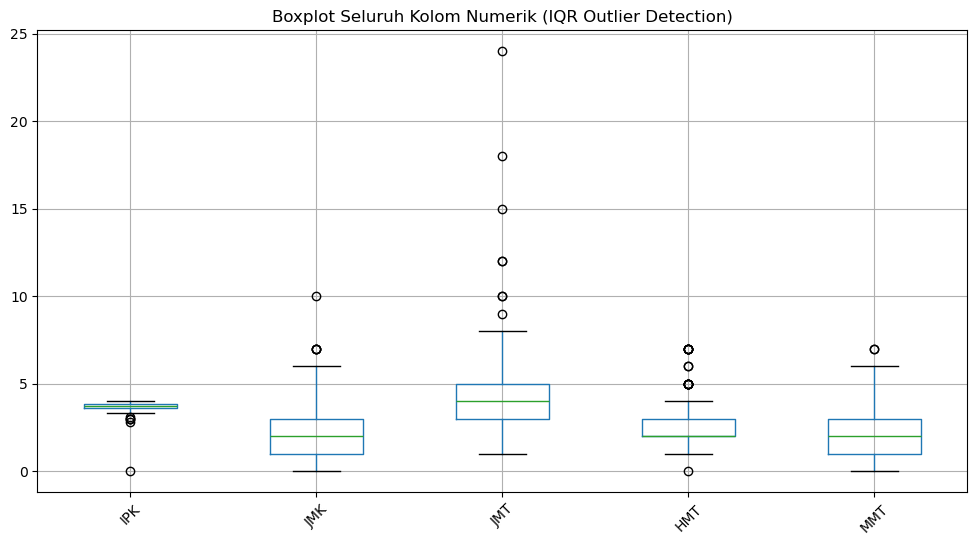

{'IPK': 6, 'JMK': 5, 'JMT': 8, 'HMT': 18, 'MMT': 2}

In [34]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR
outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_info[col] = len(outliers)

# Boxplot visualization
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Seluruh Kolom Numerik (IQR Outlier Detection)")
plt.show()

outlier_info

Kolom yang akan diimputasi: ['IPK', 'JMK', 'JMT', 'HMT', 'MMT']


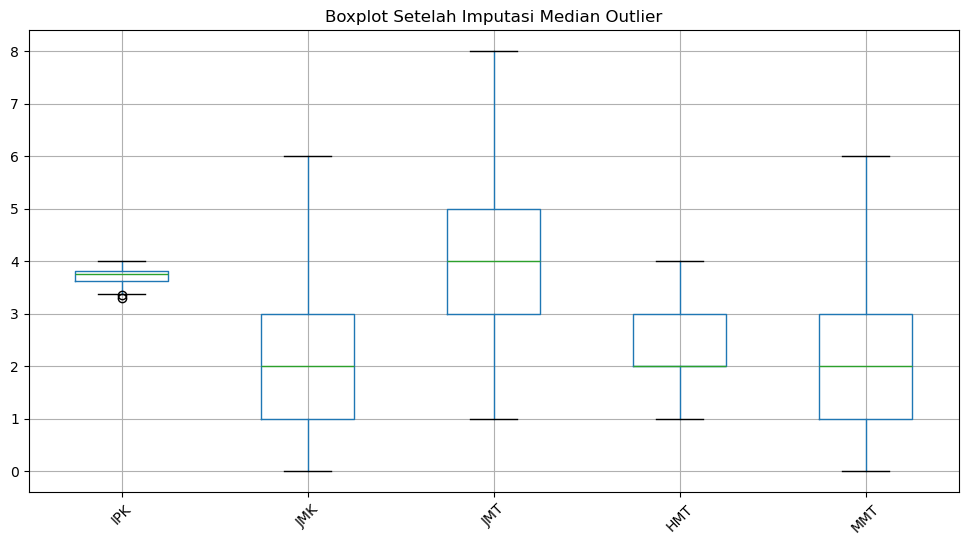

In [36]:
# Ambil kolom yang punya outlier (>0)
outlier_cols = [col for col, count in outlier_info.items() if count > 0]

# Buang kolom SEMESTER jika ada
if "SEMESTER" in outlier_cols:
    outlier_cols.remove("SEMESTER")

print("Kolom yang akan diimputasi:", outlier_cols)

# Imputasi median pada outlier
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median_value = df[col].median()

    # ganti nilai outlier dengan median
    df[col] = df[col].apply(
        lambda x: median_value if (x < lower or x > upper) else x
    )

# Visualisasi boxplot setelah imputasi
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Imputasi Median Outlier")
plt.show()

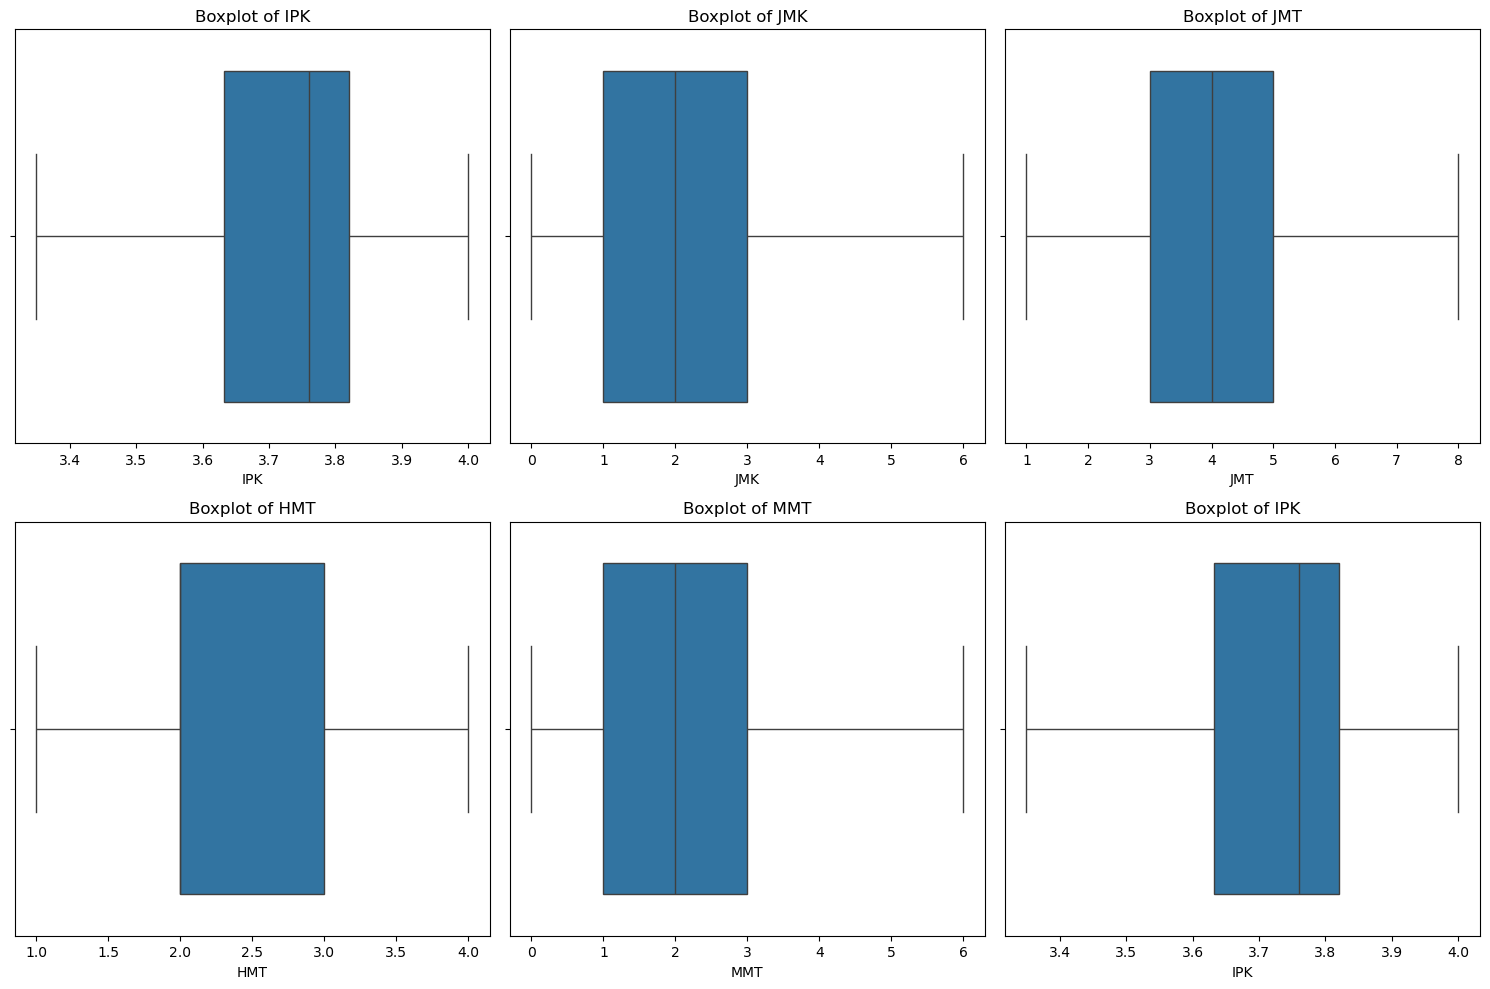

In [38]:
# --- 3. Tangani IPK dengan clipping ---
Q1 = df['IPK'].quantile(0.25)
Q3 = df['IPK'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['IPK'] = df['IPK'].clip(lower=batas_bawah, upper=batas_atas)

# setelah imputasi → buat boxplot semua kolom numerik + IPK
all_numeric = list(outlier_cols) + ['IPK']

plt.figure(figsize=(15, 5 * ((len(all_numeric) + 2) // 3)))

for i, col in enumerate(all_numeric, 1):
    plt.subplot((len(all_numeric) + 2) // 3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [39]:
import re
import numpy as np
import pandas as pd

# 1. Ambil skor 1–5 dari string seperti "3  = Cukup penting"
def ambil_skor_1_5(x):
    if pd.isna(x):
        return pd.NA
    if isinstance(x, str):
        m = re.match(r'\s*(\d)', x)
        if not m:
            return pd.NA
        return int(m.group(1))
    return int(x)

# pastikan tiga variabel ini sudah jadi angka 1–5
for col in ['PIK', 'MM', 'DBDT']:
    df[col + '_skor'] = df[col].apply(ambil_skor_1_5)

# 2. Mapping 3 kategori, disesuaikan per variabel

def kategori_PIK(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak penting'
    elif x == 3:
        return 'cukup penting'
    elif x in (4, 5):
        return 'sangat penting'
    return pd.NA

def kategori_MM(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berpengaruh'
    elif x == 3:
        return 'cukup berpengaruh'
    elif x in (4, 5):
        return 'sangat berpengaruh'
    return pd.NA

def kategori_DBDT(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berdampak'
    elif x == 3:
        return 'cukup berdampak'
    elif x in (4, 5):
        return 'sangat berdampak'
    return pd.NA

df['PIK_3kat']  = df['PIK_skor'].apply(kategori_PIK)
df['MM_3kat']   = df['MM_skor'].apply(kategori_MM)
df['DBDT_3kat'] = df['DBDT_skor'].apply(kategori_DBDT)

# optional: jadikan ordered category biar rapi
df['PIK_3kat'] = pd.Categorical(
    df['PIK_3kat'],
    categories=['tidak penting', 'cukup penting', 'sangat penting'],
    ordered=True
)

df['MM_3kat'] = pd.Categorical(
    df['MM_3kat'],
    categories=['tidak berpengaruh', 'cukup berpengaruh', 'sangat berpengaruh'],
    ordered=True
)

df['DBDT_3kat'] = pd.Categorical(
    df['DBDT_3kat'],
    categories=['tidak berdampak', 'cukup berdampak', 'sangat berdampak'],
    ordered=True
)

# Kalau mau cek distribusinya:
for col in ['PIK_3kat', 'MM_3kat', 'DBDT_3kat']:
    print(f'\nDistribusi {col}:')
    print(df[col].value_counts(dropna=False))

df


Distribusi PIK_3kat:
PIK_3kat
cukup penting     78
sangat penting    69
tidak penting     10
Name: count, dtype: int64

Distribusi MM_3kat:
MM_3kat
cukup berpengaruh     81
tidak berpengaruh     42
sangat berpengaruh    34
Name: count, dtype: int64

Distribusi DBDT_3kat:
DBDT_3kat
cukup berdampak     91
sangat berdampak    52
tidak berdampak     14
Name: count, dtype: int64


,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW,PIK_skor,MM_skor,DBDT_skor,PIK_3kat,MM_3kat,DBDT_3kat
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1.0,3 = Cukup penting,3.0,2.0,Tidak,1.0,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya,3,2,4,cukup penting,tidak berpengaruh,sangat berdampak
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1.0,3 = Cukup penting,5.0,4.0,Tidak,4.0,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak,3,1,3,cukup penting,tidak berpengaruh,cukup berdampak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0.0,3 = Cukup penting,2.0,1.0,Ya,2.0,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya,3,1,2,cukup penting,tidak berpengaruh,tidak berdampak
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2.0,3 = Cukup penting,3.0,2.0,Tidak,0.0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0.0,2 = Kurang penting,5.0,3.0,Ya,3.0,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak,2,4,4,tidak penting,sangat berpengaruh,sangat berdampak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Fakultas Arsitektur dan Desain,DKV,3.76,Tidak,0.0,3 = Cukup penting,6.0,4.0,Ya,0.0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
153,Fakultas Ilmu Komputer,Sistem Informasi,3.80,Ya,3.0,4 = Penting,8.0,2.0,Tidak,0.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,4,3,3,sangat penting,cukup berpengaruh,cukup berdampak
154,Fakultas Ilmu Komputer,Sains Data,3.80,Ya,1.0,3 = Cukup penting,3.0,1.0,Tidak,2.0,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak
155,Fakultas Hukum,Ilmu Hukum,3.79,Ya,3.0,3 = Cukup penting,2.0,2.0,Tidak,5.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak


In [42]:
# drop kolom
df = df.drop(columns=["FAKULTAS", "JURUSAN", "PIK", "MM", "DBDT", "PIK_skor", "MM_skor", "DBDT_skor"])

# cek hasil
df.head()

,IPK,IK,JMK,JMT,HMT,KKM,MMT,MTS,MW,PIK_3kat,MM_3kat,DBDT_3kat
0,3.93,Ya,1.0,3.0,2.0,Tidak,1.0,Ya,Ya,cukup penting,tidak berpengaruh,sangat berdampak
1,3.67,Ya,1.0,5.0,4.0,Tidak,4.0,Ya,Tidak,cukup penting,tidak berpengaruh,cukup berdampak
2,3.50,Tidak,0.0,2.0,1.0,Ya,2.0,Tidak,Ya,cukup penting,tidak berpengaruh,tidak berdampak
3,3.78,Ya,2.0,3.0,2.0,Tidak,0.0,Ya,Tidak,cukup penting,tidak berpengaruh,sangat berdampak
4,3.93,Tidak,0.0,5.0,3.0,Ya,3.0,Tidak,Tidak,tidak penting,sangat berpengaruh,sangat berdampak


In [44]:
df['Y_MW'] = df['MW'].map({'Ya':1, 'Tidak':0})

num_cols = ['IPK', 'JMK', 'JMT', 'HMT', 'MMT']
cat_cols = ['IK', 'KKM', 'MTS', 'PIK_3kat', 'MM_3kat', 'DBDT_3kat']

df_num = df[num_cols]

df_dummy = pd.get_dummies(df[cat_cols], drop_first=True).astype(int)

df_final = pd.concat([df_num, df_dummy, df['Y_MW']], axis=1)

df_final.head()


,IPK,JMK,JMT,HMT,MMT,IK_Ya,KKM_Ya,MTS_Ya,PIK_3kat_cukup penting,PIK_3kat_sangat penting,MM_3kat_cukup berpengaruh,MM_3kat_sangat berpengaruh,DBDT_3kat_cukup berdampak,DBDT_3kat_sangat berdampak,Y_MW
0,3.93,1.0,3.0,2.0,1.0,1,0,1,1,0,0,0,0,1,1
1,3.67,1.0,5.0,4.0,4.0,1,0,1,1,0,0,0,1,0,0
2,3.50,0.0,2.0,1.0,2.0,0,1,0,1,0,0,0,0,0,1
3,3.78,2.0,3.0,2.0,0.0,1,0,1,1,0,0,0,0,1,0
4,3.93,0.0,5.0,3.0,3.0,0,1,0,0,0,0,1,0,1,0


**Statistika Regresi Logistik**

In [47]:
import statsmodels.api as sm

X = df_final.drop(columns=['Y_MW'])
y = df_final['Y_MW']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.257652
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Y_MW   No. Observations:                  157
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                           14
Date:                Mon, 01 Dec 2025   Pseudo R-squ.:                  0.2486
Time:                        20:54:55   Log-Likelihood:                -40.451
converged:                       True   LL-Null:                       -53.836
Covariance Type:            nonrobust   LLR p-value:                   0.02063
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -7.1344      7.733     -0.923      0.356     -

In [69]:
from scipy.stats import chi2
import numpy as np
import pandas as pd

# Prediksi probabilitas dari model reduced (MNLogit)
y_pred = result_reduced.predict()

# AMBIL HANYA PROBABILITAS UNTUK KELAS 1
y_pred_bin = y_pred[:, 1]

# Y asli (0/1)
y_true = df_final['Y_MW']

g = 10  # jumlah grup

data_hl = pd.DataFrame({"y": y_true, "p": y_pred_bin})

# Buat grup (10 grup)
data_hl["group"] = pd.qcut(data_hl["p"], g, duplicates="drop")

hl_table = data_hl.groupby("group").agg(
    observed = ("y", "sum"),
    expected = ("p", "sum"),
    n = ("y", "count")
)

hl_table["OE"] = (hl_table["observed"] - hl_table["expected"])**2 / (
    hl_table["expected"] * (1 - hl_table["expected"]/hl_table["n"])
)

HL_stat = hl_table["OE"].sum()
df_hl = g - 2
p_hl = 1 - chi2.cdf(HL_stat, df_hl)

print("Hosmer-Lemeshow statistic:", HL_stat)
print("Degrees of freedom:", df_hl)
print("p-value:", p_hl)


Hosmer-Lemeshow statistic: 0.0
Degrees of freedom: 8
p-value: 1.0


C:\Users\hizkia samhan r\AppData\Local\Temp\ipykernel_45876\1424882791.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hl_table = data_hl.groupby("group").agg(


In [51]:
pvals = result.pvalues
sig_vars = pvals[pvals < 0.05].index.tolist()
sig_vars = [v for v in sig_vars if v != "const"]

print("Variabel signifikan:", sig_vars)

Variabel signifikan: ['PIK_3kat_cukup penting', 'PIK_3kat_sangat penting']


**Regresi Logistik Variabel signifikan**

In [53]:
X_reduced = df_final[sig_vars]
X_reduced = sm.add_constant(X_reduced)
y = df_final['Y_MW']

model_reduced = sm.Logit(y, X_reduced)
result_reduced = model_reduced.fit()

print(result_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.300425
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Y_MW   No. Observations:                  157
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Dec 2025   Pseudo R-squ.:                  0.1239
Time:                        20:54:57   Log-Likelihood:                -47.167
converged:                       True   LL-Null:                       -53.836
Covariance Type:            nonrobust   LLR p-value:                  0.001269
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.972e-16      0.632  -6.28e-16      1.000      -1.240   

In [55]:
X_reduced = df_final[sig_vars]
X_reduced = sm.add_constant(X_reduced)


In [57]:
model_reduced = sm.MNLogit(df_final['Y_MW'], X_reduced)
result_reduced = model_reduced.fit()


Optimization terminated successfully.
         Current function value: 0.300425
         Iterations 7


In [59]:
print("AIC (reduced):", result_reduced.aic)
print("BIC (reduced):", result_reduced.bic)


AIC (reduced): 100.33337850322644
BIC (reduced): 109.50211591927136


In [61]:
import numpy as np

# Ambil koefisien model reduced
params = result_reduced.params
odds = np.exp(params)

odds

,0
const,1.000000
PIK_3kat_cukup penting,7.666667
PIK_3kat_sangat penting,22.000000


In [63]:
# UJI SERENTAK – LIKELIHOOD RATIO TEST (MODEL VS NULL)

lr_stat  = result.llr          # statistik LR
df_lr    = result.df_model     # derajat bebas (jumlah koefisien slope)
p_lr     = result.llr_pvalue   # p-value uji serentak

print("LR statistic :", lr_stat)
print("df          :", df_lr)
print("LR p-value  :", p_lr)

LR statistic : 26.769379333016374
df          : 14.0
LR p-value  : 0.020626130019530172


In [65]:
# Uji parsial: PIK_3kat_cukup penting = 0
wald_cukup = result.wald_test("PIK_3kat_cukup penting = 0")
print(wald_cukup)

# Uji parsial: PIK_3kat_sangat penting = 0
wald_sangat = result.wald_test("PIK_3kat_sangat penting = 0")
print(wald_sangat)


<Wald test (chi2): statistic=[[4.4235982]], p-value=0.03544521693055715, df_denom=1>
<Wald test (chi2): statistic=[[6.13255877]], p-value=0.013271466147709325, df_denom=1>


C:\Users\hizkia samhan r\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ambil semua variabel independen (kecuali Y)
X = df_final.drop(columns=['Y_MW'])

# Pastikan semuanya numerik
X = X.astype(float)

# Tambahkan konstanta untuk VIF
X_const = sm.add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)


                      Variable         VIF
0                        const  704.419254
1                          IPK    1.093556
2                          JMK    1.357745
3                          JMT    1.162620
4                          HMT    1.091233
5                          MMT    1.149568
6                        IK_Ya    1.492427
7                       KKM_Ya    1.165961
8                       MTS_Ya    1.135262
9       PIK_3kat_cukup penting    5.691650
10     PIK_3kat_sangat penting    6.090074
11   MM_3kat_cukup berpengaruh    1.817176
12  MM_3kat_sangat berpengaruh    1.819584
13   DBDT_3kat_cukup berdampak    3.927351
14  DBDT_3kat_sangat berdampak    3.919076
